In [82]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'kB':
                numeric_value /= 1000  # Convert KiB to MiB
            # if unit == 'GB':
            #     numeric_value *= 1000  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MB/s')

    return numeric_values

In [83]:
df = pd.read_csv("multi_fio.csv")

diskList=[1, 2, 3, 4]

lsvd_240gb_ssd_rr=[]
lsvd_240gb_ssd_sr=[]
rbd_ssd_rr=[]


for value in diskList:
    bs='4'
    qd= 128
    pt='ssd'
    dt='lsvd'
    
    conditions_240gb_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) &  
        (df['workload'] == 'randread') &
        # (df['bs'] == bs) &
        (df['bs'].isin([bs + 'k', bs + 'ki'])) &
        (df['disks'] == value) &
        (df['iodepth']==qd)
    )

    # conditions_240gb_lsvd_ssd_sr = (
    #     (df['pool_type'] == pt) & 
    #     (df['disk_type'] == dt) &  
    #     (df['workload'] == 'read') &
    #     # (df['bs'] == bs) &
    #     (df['bs'].isin([bs + 'k', bs + 'ki'])) &
    #     (df['disks'] == value) &
    #     (df['iodepth']==qd)
    # )
    
    dt='rbd'
    conditions_rbd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) &  
        (df['workload'] == 'randread') &
        # (df['bs'] == bs) &
        (df['bs'].isin([bs + 'k', bs + 'ki'])) &
        (df['disks'] == value) &
        (df['iodepth']==qd)
    )


    bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
    bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw_mb'].iloc[0]
    # print(bw_240gb_lsvd_ssd_rr)
    lsvd_240gb_ssd_rr.append(bw_240gb_lsvd_ssd_rr)

    
    # bw_240gb_lsvd_ssd_rw=df[conditions_240gb_lsvd_ssd_rw]
    # bw_240gb_lsvd_ssd_rw=bw_240gb_lsvd_ssd_rw['bw_mb'].iloc[0]
    # lsvd_240gb_ssd_rw.append(bw_240gb_lsvd_ssd_rw)
    # lsvd_240gb_ssd_rw1=extract_values(lsvd_240gb_ssd_rw)
    # # print(bw_240gb_lsvd_ssd_rw)
    
    # bw_240gb_lsvd_ssd_sr=df[conditions_240gb_lsvd_ssd_sr]
    # bw_240gb_lsvd_ssd_sr=bw_240gb_lsvd_ssd_sr['bw_mb'].iloc[0]
    # lsvd_240gb_ssd_sr.append(bw_240gb_lsvd_ssd_sr)
    # print(bw_240gb_lsvd_ssd_rr)
    # lsvd_240gb_ssd_sr1=extract_values(lsvd_240gb_ssd_sr)
    # #print(bw_240gb_lsvd_ssd_sr)
    
    # bw_240gb_lsvd_ssd_sw=df[conditions_240gb_lsvd_ssd_sw]
    # bw_240gb_lsvd_ssd_sw=bw_240gb_lsvd_ssd_sw['bw_mb'].iloc[0]
    # lsvd_240gb_ssd_sw.append(bw_240gb_lsvd_ssd_sw)
    # lsvd_240gb_ssd_sw1=extract_values(lsvd_240gb_ssd_sw)
    # #print(bw_240gb_lsvd_ssd_sw)
    # # rbd_ssd_rr1=extract_values(rbd_ssd_rr)

    #uncomment
    # bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
    # bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw_mb'].iloc[0]
    # rbd_ssd_rr.append(bw_rbd_ssd_rr)

    
    # bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
    # bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw_mb'].iloc[0]
    # rbd_ssd_rw.append(bw_rbd_ssd_rw)
    # rbd_ssd_rw1= extract_values(rbd_ssd_rw)
    # # print(bw_rbd_ssd_rw)
    
    # bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
    # bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw_mb'].iloc[0]
    # rbd_ssd_sr.append(bw_rbd_ssd_sr)
    # rbd_ssd_sr1= extract_values(rbd_ssd_sr)
    # #print(bw_rbd_ssd_sr)
    
    # bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
    # bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw_mb'].iloc[0]
    # rbd_ssd_sw.append(bw_rbd_ssd_sw)
    # rbd_ssd_sw1= extract_values(rbd_ssd_sw)
    # # print(rbd_ssd_sw1)

lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)
print(lsvd_240gb_ssd_rr1)
# rbd_ssd_rr1= extract_values(rbd_ssd_rr)
# print(rbd_ssd_rr1)

[264.0, 525.0, 658.0, 716.0]


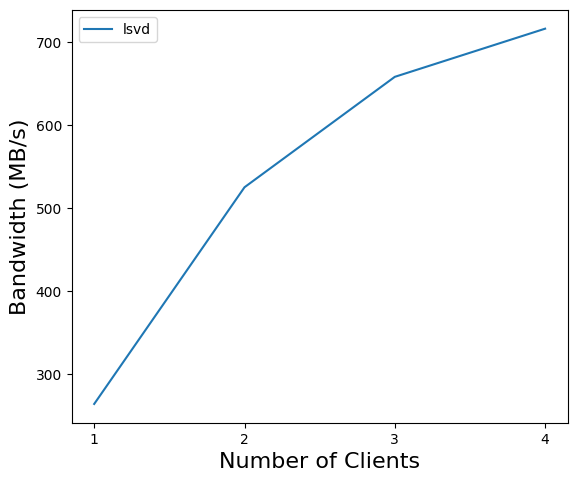

In [84]:
plt.plot(diskList, lsvd_240gb_ssd_rr1, label = "lsvd" )
# plt.plot(queueList, lsvd_240gb_ssd_sw1, label = "lsvd_ssd" )
# plt.plot(queueList, rbd_hdd_sw1, label = "rbd_hdd" )
# plt.plot(queueList, rbd_ssd_sw1, label = "rbd_ssd" )
plt.xlabel('Number of Clients', fontweight ='normal', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
plt.xticks(diskList)
description = f"Bandwidth for random read with increasing number of clients. SSD Backend, 80GB volume, 240GB cache, {bs}K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
plt.subplots_adjust(bottom=0.02) 
# plt.ylim(0, 400)
plt.savefig(f'multi_bw_{qd}_{bs}_rr.png')
plt.show()

In [88]:
df = pd.read_csv("multi_fio.csv")

queueList= [1, 32, 64, 128, 256]
bsList= ['4', '8' '16', '32', '64']
diskList=[1, 2, 3, 4]

lsvd_240gb_ssd_rr=[]
rbd_ssd_rr=[]

for qd_value in queueList:
    for bs_value in bsList:
        for value in diskList:
            pt='ssd'
            dt='lsvd'
            print(qd_value, bs_value, value)
            conditions_240gb_lsvd_ssd_rr = (
                (df['pool_type'] == pt) & 
                (df['disk_type'] == dt) &  
                (df['workload'] == 'randread') &
                # (df['bs'] == bs) &
                (df['bs'].isin([bs_value + 'k', bs_value + 'ki'])) &
                (df['disks'] == value) &
                (df['iodepth']==qd_value)
            )
            
            dt='rbd'
            conditions_rbd_ssd_rr = (
                (df['pool_type'] == pt) & 
                (df['disk_type'] == dt) &  
                (df['workload'] == 'randread') &
                # (df['bs'] == bs) &
                (df['bs'].isin([bs_value + 'k', bs_value + 'ki'])) &
                (df['disks'] == value) &
                (df['iodepth']==qd_value)
            )
        
        
            bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
            bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw_mb'].iloc[0]
            # print(bw_240gb_lsvd_ssd_rr)
            lsvd_240gb_ssd_rr.append(bw_240gb_lsvd_ssd_rr)
        
            #uncomment
            # bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
            # bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw_mb'].iloc[0]
            # rbd_ssd_rr.append(bw_rbd_ssd_rr)

        lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)
        print(lsvd_240gb_ssd_rr1)
        # rbd_ssd_rr1= extract_values(rbd_ssd_rr)
        # print(rbd_ssd_rr1)

        plt.plot(diskList, lsvd_240gb_ssd_rr1, label = "lsvd" )
        # plt.plot(queueList, lsvd_240gb_ssd_sw1, label = "lsvd_ssd" )
        # plt.plot(queueList, rbd_hdd_sw1, label = "rbd_hdd" )
        # plt.plot(queueList, rbd_ssd_sw1, label = "rbd_ssd" )
        plt.xlabel('Number of Clients', fontweight ='normal', fontsize = 16) 
        plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
        plt.xticks(diskList)
        description = f"Bandwidth for random read with increasing number of clients. SSD Backend, 80GB volume, 240GB cache, {bs}K blocksize"
        # plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
        plt.legend() 
        plt.subplots_adjust(bottom=0.02) 
        # plt.ylim(0, 400)
        # plt.savefig(f'multi_bw_{qd}_{bs}_rr.png')
        plt.show()
        lsvd_240gb_ssd_rr=[]
        rbd_ssd_rr=[]
        

1 4 1


IndexError: single positional indexer is out-of-bounds